# Connecting to CosmosDB
The first thing you need to do is to connect to your database.  Because you are already logged into Cosmos you do not need to add keys.  

In [3]:
import azure.cosmos
from azure.cosmos.partition_key import PartitionKey

database = cosmos_client.create_database_if_not_exists('cartdemo')

container = database.create_container_if_not_exists(id='environmenttelem', partition_key=PartitionKey(path='/partitionkey'))



# Import Pandas
Next Pandas is imported for data manipulation.

In [2]:
import pandas as pd

# SQL Query to Pandas
Next a SQL Statement will be converted to the df_cosmos Pandas dataframe.

In [62]:
%%sql --database cartdemo --container environmenttelem --output df_cosmos
SELECT top 10 c.deviceid, c.temperature, c.humidity, c.time,udf.getLastHourTime() as rr ,c._ts
FROM c 

order by c.time

▶ View Query Metrics 
 
 
 
 totalExecutionTimeInMs : 4.44 queryCompileTimeInMs : 0.19 queryLogicalPlanBuildTimeInMs : 0.04 queryPhysicalPlanBuildTimeInMs : 0.05 queryOptimizationTimeInMs : 0 VMExecutionTimeInMs : 3.95 indexLookupTimeInMs : 0.21 documentLoadTimeInMs : 0.19 systemFunctionExecuteTimeInMs : 0 userFunctionExecuteTimeInMs : 3.16 retrievedDocumentCount : 10 retrievedDocumentSize : 4217 outputDocumentCount : 10 outputDocumentSize : 2752 writeOutputTimeInMs : 0.18 averageIndexUtilizationRation : 1

In [63]:
df_cosmos

,deviceid,temperature,humidity,time,rr,_ts
0,Pi_Envirnoment,31.797519,62.267539,2020-04-08T22:14:52.795Z,1.586388e+09,1586384114
1,Pi_Envirnoment,21.719572,79.449479,2020-04-08T22:14:53.874Z,1.586388e+09,1586384114
2,Pi_Envirnoment,24.700159,64.942318,2020-04-08T22:14:54.94Z,1.586388e+09,1586384114
3,Pi_Envirnoment,34.179067,70.598489,2020-04-08T22:14:56.018Z,1.586388e+09,1586384114
4,Pi_Envirnoment,28.532878,62.983302,2020-04-08T22:14:57.066Z,1.586388e+09,1586384114
5,Pi_Envirnoment,20.924995,66.772171,2020-04-08T22:14:58.144Z,1.586388e+09,1586384114
6,Pi_Envirnoment,31.765567,62.708183,2020-04-08T22:14:59.218Z,1.586388e+09,1586384114
7,Pi_Envirnoment,23.151447,70.711837,2020-04-08T22:15:00.281Z,1.586388e+09,1586384114
8,Pi_Envirnoment,21.001460,65.154819,2020-04-08T22:15:01.39Z,1.586388e+09,1586384115
9,Pi_Envirnoment,24.746577,69.513592,2020-04-08T22:15:02.489Z,1.586388e+09,1586384115


# Plot data
Next we plot data from the data frame.

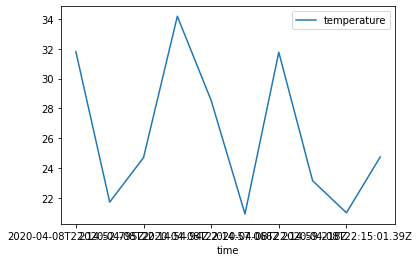

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_cosmos.plot(y='temperature', x='time')

# Aggregate Query
Using a group by query we put the minimums and maximums of each minuite.

In [42]:
%%sql --database cartdemo --container environmenttelem --output df_minmax
SELECT   max(c.temperature) as Tmax
, min(c.temperature) as Tmin 
, max(c.humidity) Hmax
, min(c.humidity) Hmin
, SUBSTRING(c.time, 14, 2) as minuite

FROM c 
where c.time >= udf.getLastHourTime()
group by SUBSTRING(c.time, 14, 2)


▶ View Query Metrics 
 
 
 
 totalExecutionTimeInMs : 1594.74 queryCompileTimeInMs : 0.81 queryLogicalPlanBuildTimeInMs : 0.21 queryPhysicalPlanBuildTimeInMs : 0.18 queryOptimizationTimeInMs : 0 VMExecutionTimeInMs : 1592.84 indexLookupTimeInMs : 0.52 documentLoadTimeInMs : 106.61 systemFunctionExecuteTimeInMs : 0 userFunctionExecuteTimeInMs : 1432.38 retrievedDocumentCount : 6052 retrievedDocumentSize : 2550635 outputDocumentCount : 0 outputDocumentSize : 98 writeOutputTimeInMs : 0 averageIndexUtilizationRation : 0

<Figure size 1760x960 with 0 Axes>

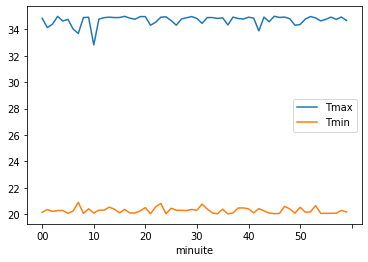

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 12), dpi=80, facecolor='w', edgecolor='k')
df_minmax.sort_values(by=['minuite'], inplace=True)
df_minmax.plot(y=['Tmax','Tmin'], x='minuite')

/home/cosmosuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/cosmosuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/home/cosmosuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/home/cosmosuser/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75ed3ae978>,
      dtype=object)

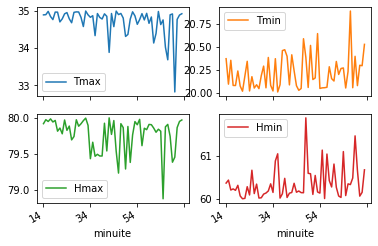

In [39]:
df_minmax.plot(y=['Tmax',"Tmin","Hmax","Hmin"], x='minuite', subplots=True, layout=(2,2))